<br></br>
# **gensim | word2vec**
<br></br>
## **1 데이터 전처리**

In [1]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
f     = open('./data/베를린선언.txt', 'r', encoding='utf-8')
texts = f.read()
f.close()

texts = texts.replace('\n\n', '\n')
texts = texts.replace('\n\n', '\n')
texts[:500]

'존경하는 독일 국민 여러분,\n고국에 계신 국민 여러분,\n하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,\n먼저, 냉전과 분단을 넘어 통일을 이루고,\n그 힘으로 유럽통합과 국제평화를 선도하고 있는\n독일과 독일 국민에게 무한한 경의를 표합니다.\n오늘 이 자리를 마련해 주신\n독일 정부와 쾨르버 재단에도 감사드립니다.\n아울러, 얼마 전 별세하신 故 헬무트 콜 총리의 가족과 \n독일 국민들에게 깊 은 애도와 위로의 마음을 전합니다.\n대한민국은, 냉전시기 어려운 환경 속에서도\n적극적이고 능동적인 외교로 독일 통일과 유럽통합을 주도한\n헬무트 콜 총리의 위대한 업적을 기억할 것입니다.\n친애하는 내외 귀빈 여러분,\n이곳 베를린은 지금으로부터 17년 전, \n한국의 김대중 대통령이 남북 화해·협력의 기틀을 마련한 \n‘베를린 선언’을 발표한 곳입니다. \n여기 알테스 슈타트하우스(Altes Stadhaus)는\n독일 통일조약 협상이 이뤄졌던 역사적 현장입니다.\n나는 오늘, 베를린의'

In [2]:
# 텍스트를 한 줄씩 문법 tag를 추가한다
from konlpy.tag import Okt
twitter    = Okt()

token_sent = texts.split('\n')
token_sent[:5]

['존경하는 독일 국민 여러분,',
 '고국에 계신 국민 여러분,',
 '하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,',
 '먼저, 냉전과 분단을 넘어 통일을 이루고,',
 '그 힘으로 유럽통합과 국제평화를 선도하고 있는']

In [3]:
%%time
results_sent = []
for token in token_sent:
    twitter_token = twitter.pos(token, norm=True, stem=True)
    results = [ word[0]   
               for word in twitter_token    # 어미/조사/구두점 제외
               if not word[1] in ["Eomi", "Josa", "Punctuation"] ]
    rl = (" ".join(results)).strip()
    results_sent.append(rl)
print(results_sent[:5])

['존경 하다 독일 국민 여러분', '고국 계시다 국민 여러분', '하울 젠 쾨르버 재단 이사 님 모드 전 동독 총리 님 비롯 내외 귀빈 여러분', '먼저 냉전 분단 넘다 통일 이루다', '그 힘 유럽 통합 국제 평화 선도 있다']
CPU times: user 12.1 s, sys: 244 ms, total: 12.4 s
Wall time: 4.39 s


In [4]:
texts_file = './data/Berlin.tagged'
with open(texts_file, 'w', encoding='utf-8') as file:
    file.write("\n".join(results_sent))

In [5]:
! cat ./data/Berlin.tagged | head -n 5

존경 하다 독일 국민 여러분
고국 계시다 국민 여러분
하울 젠 쾨르버 재단 이사 님 모드 전 동독 총리 님 비롯 내외 귀빈 여러분
먼저 냉전 분단 넘다 통일 이루다
그 힘 유럽 통합 국제 평화 선도 있다


<br></br>
## **2 Word 2 vec 객체 만들기**
gensim

In [6]:
# ! pip3 install gensim

In [7]:
%%time
texts_file = './data/Berlin.tagged'

from gensim.models import word2vec
data  = word2vec.LineSentence(texts_file)
model = word2vec.Word2Vec(data, size=200, window=2, hs=1, min_count=2, sg=1)
model.save("./data/Berlin.model")
print("model saved.")

model saved.
CPU times: user 2.51 s, sys: 127 ms, total: 2.63 s
Wall time: 2.9 s


<br></br>
## **3 저장된 객체 활용**
gensim

In [16]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('./data/Berlin.model')
model.wv.most_similar(positive=['베를린'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('선언', 0.47703757882118225),
 ('있다', 0.44741588830947876),
 ('북한', 0.40215277671813965),
 ('독일', 0.35181984305381775),
 ('나', 0.33310338854789734),
 ('방문', 0.3269475996494293),
 ('10.4', 0.3248727023601532),
 ('정상', 0.31733080744743347),
 ('계기', 0.30704158544540405),
 ('‘', 0.30538278818130493)]

In [9]:
model.wv.most_similar(positive=['통일'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('여건', 0.39404651522636414),
 ('방문', 0.3699634075164795),
 ('포괄', 0.32556024193763733),
 ('들', 0.3076861500740051),
 ('냉전', 0.29912692308425903),
 ('교류', 0.2977752089500427),
 ('중요하다', 0.2953208088874817),
 ('선언', 0.29359135031700134),
 ('적', 0.28915655612945557),
 ('분야', 0.28913724422454834)]

In [10]:
model.wv.most_similar(positive=['정치'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('분야', 0.4831816852092743),
 ('있다', 0.4439251124858856),
 ('민간', 0.3800472915172577),
 ('방문', 0.3724372088909149),
 ('방향', 0.3585211932659149),
 ('여건', 0.3496103882789612),
 ('김대중', 0.3439222276210785),
 ('교류', 0.3415157198905945),
 ('냉전', 0.3399214744567871),
 ('들', 0.3390945494174957)]

In [11]:
model.wv.most_similar(positive=['대한민국', '한반도'], 
                      negative=['정치'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('제', 0.266220360994339),
 ('정권', 0.2635658383369446),
 ('말', 0.21650895476341248),
 ('신뢰', 0.20039208233356476),
 ('핵', 0.18023492395877838),
 ('되다', 0.17829258739948273),
 ('평화', 0.17321951687335968),
 ('힘', 0.1731787472963333),
 ('한미', 0.1707523912191391),
 ('이르다', 0.1703748106956482)]

<br></br>
## **04 Visulaization**
gensim

In [12]:
# model.wv.vocab : { word: object of numeric vector }
vocab  = list(model.wv.vocab)
X      = model[vocab]
X.shape

/home/markbaum/Python/nltk/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(330, 200)

In [13]:
from sklearn.manifold import TSNE
tsne   = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [14]:
import pandas as pd
df = pd.DataFrame(X_tsne, 
                  index = vocab, 
                  columns=['x', 'y'])
df.head()

,x,y
존경,-7.113796,-6.669795
하다,-12.295039,4.246457
독일,-10.773159,-1.135302
국민,-2.850163,-8.403632
여러분,-7.324178,-6.981918


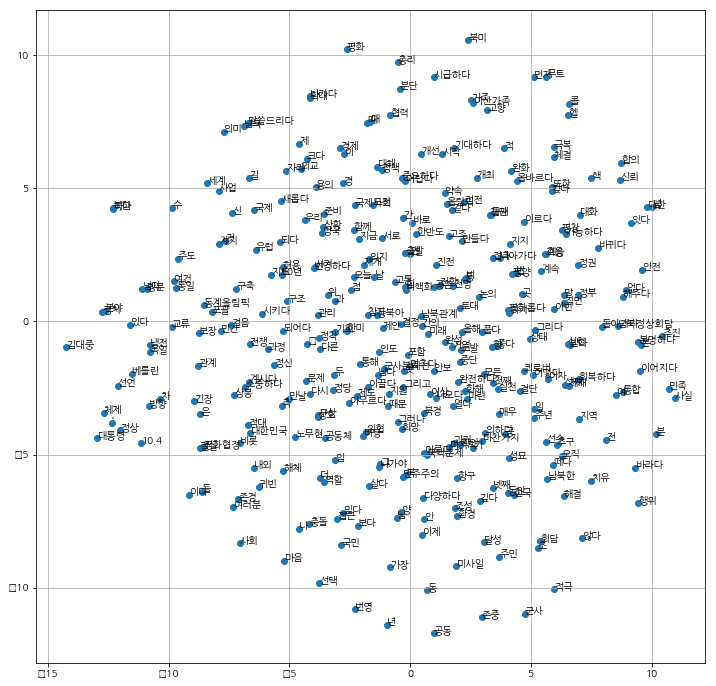

In [15]:
%matplotlib inline
from matplotlib import rc
rc('font', family='NanumGothic')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.grid(True)